In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [11]:
with open("../scripts/dpo_rl_model/dataset.pickle", "rb") as file:
    original_df = pickle.load(file)

In [12]:
original_df

,description,configuration,parameters,argos,type,scores_bt1,scores_bt2,bt1,bt2,scores_bt1_scaled,scores_bt2_scaled,chosen,rejected,score_chosen,score_rejected,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-10.973251,-9.411235,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.942572,1.000000,<s>[INST] The environment features a circle co...,<s>[INST] The environment features a circle co...,1.000000,0.942572,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-9.105604,-8.995149,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.994287,1.000000,<s>[INST] The rectangular area has dimensions ...,<s>[INST] The rectangular area has dimensions ...,1.000000,0.994287,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-13.84357,-10.723578,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.749227,0.910601,"<s>[INST] With a radius of 3.54 meters, the ci...","<s>[INST] With a radius of 3.54 meters, the ci...",0.910601,0.749227,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-12.73638,-13.19668,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.877750,0.860827,"<s>[INST] In this setting, a circular arena wi...","<s>[INST] In this setting, a circular arena wi...",0.877750,0.860827,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-28.32906,-15.25997,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.000000,0.675967,<s>[INST] The environment is constructed as a ...,<s>[INST] The environment is constructed as a ...,0.675967,0.000000,0
5,The rectangular area has dimensions 6.00 m x 3...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Aggregation,0.166667,0.033333,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,1.000000,0.000000,<s>[INST] The rectangular area has dimensions ...,<s>[INST] The rectangular area has dimensions ...,1.000000,0.000000,0
6,"With a radius of 4.91 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,1.1,0.1,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,1.000000,0.090909,"<s>[INST] With a radius of 4.91 meters, the ci...","<s>[INST] With a radius of 4.91 meters, the ci...",1.000000,0.090909,0
7,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.0,0.1,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.000000,0.090909,<s>[INST] The environment features a circle co...,<s>[INST] The environment features a circle co...,0.090909,0.000000,0
8,The environment c

In [13]:
df = original_df

In [14]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

    dataset_position          type average_score
0                  0   Aggregation           0.1
1                  0    Connection    -19.400903
2                  0  Distribution    -14.376155
3                  0      Foraging      0.283333
4                  1   Aggregation      0.066667
5                  1    Connection    -37.027021
6                  1  Distribution     -12.27148
7                  1      Foraging      0.933333
8                  2   Aggregation      0.108333
9                  2    Connection    -29.512948
10                 2  Distribution    -12.481189
11                 2      Foraging      0.416667
12                 3   Aggregation      0.033333
13                 3    Connection    -38.089465
14                 3  Distribution    -12.055725
15                 3      Foraging      0.883333
16                 4   Aggregation      0.108333
17                 4    Connection    -25.302092
18                 4  Distribution    -12.750017
19                 4

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

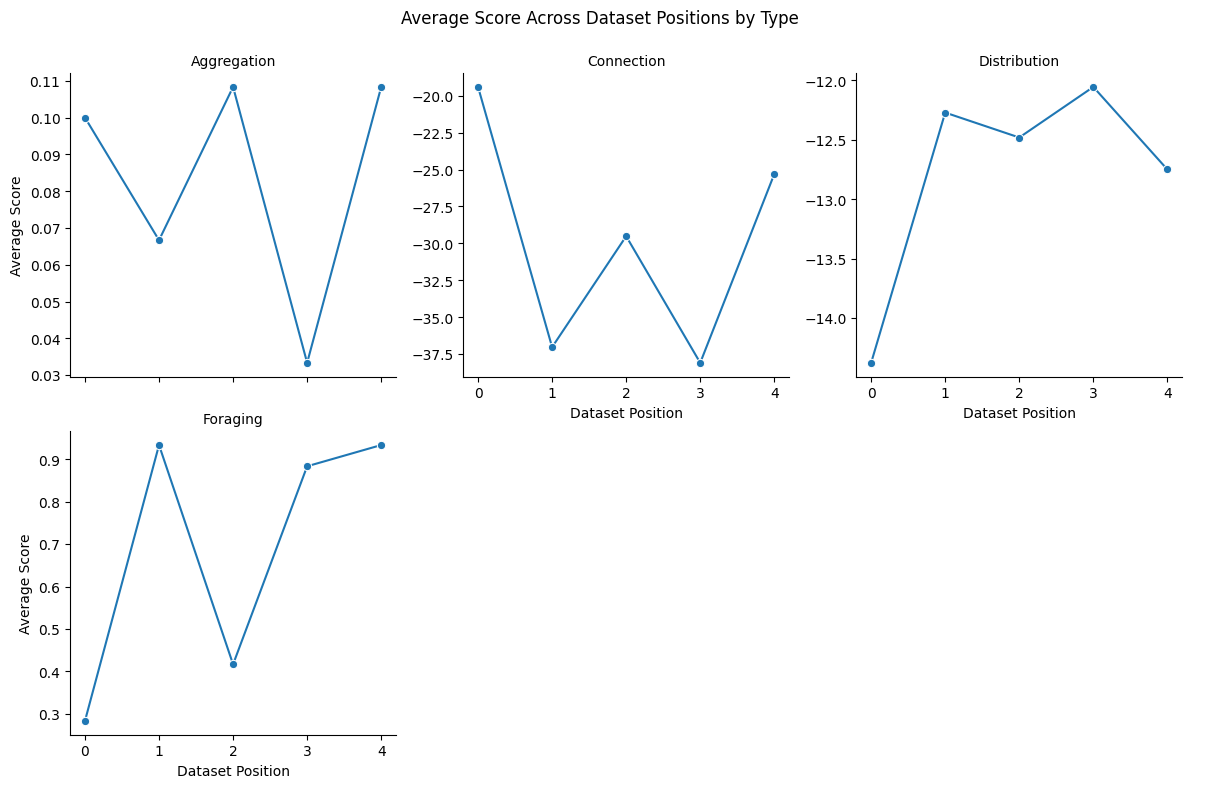

In [16]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()